In [5]:
#path to csv data 
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [6]:
#convert csv to numpy 
train = np.loadtxt(path_train, delimiter=',', skiprows=1)
test = np.loadtxt(path_test, delimiter=',', skiprows=1)

In [7]:
#training data
X_train = train[:,1:]
y_train = train[:,0]

#testing data 
X_test = test[:,1:]
y_test = test[:,0]

In [8]:
#reshape to image 
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [9]:
#Shape of training and testing data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (27455, 28, 28)
y_train shape: (27455,)
X_test shape: (7172, 28, 28)
y_test shape: (7172,)


In [10]:
import numpy as np
from scipy.ndimage import gaussian_filter

# Define the standard deviation of the Gaussian filter
sigma = 1

# Apply the Gaussian filter to the training data
X_train_smoothed = np.zeros(X_train.shape)
for i in range(len(X_train)):
    X_train_smoothed[i] = gaussian_filter(X_train[i], sigma)

# Apply the Gaussian filter to the test data
X_test_smoothed = np.zeros(X_test.shape)
for i in range(len(X_test)):
    X_test_smoothed[i] = gaussian_filter(X_test[i], sigma)


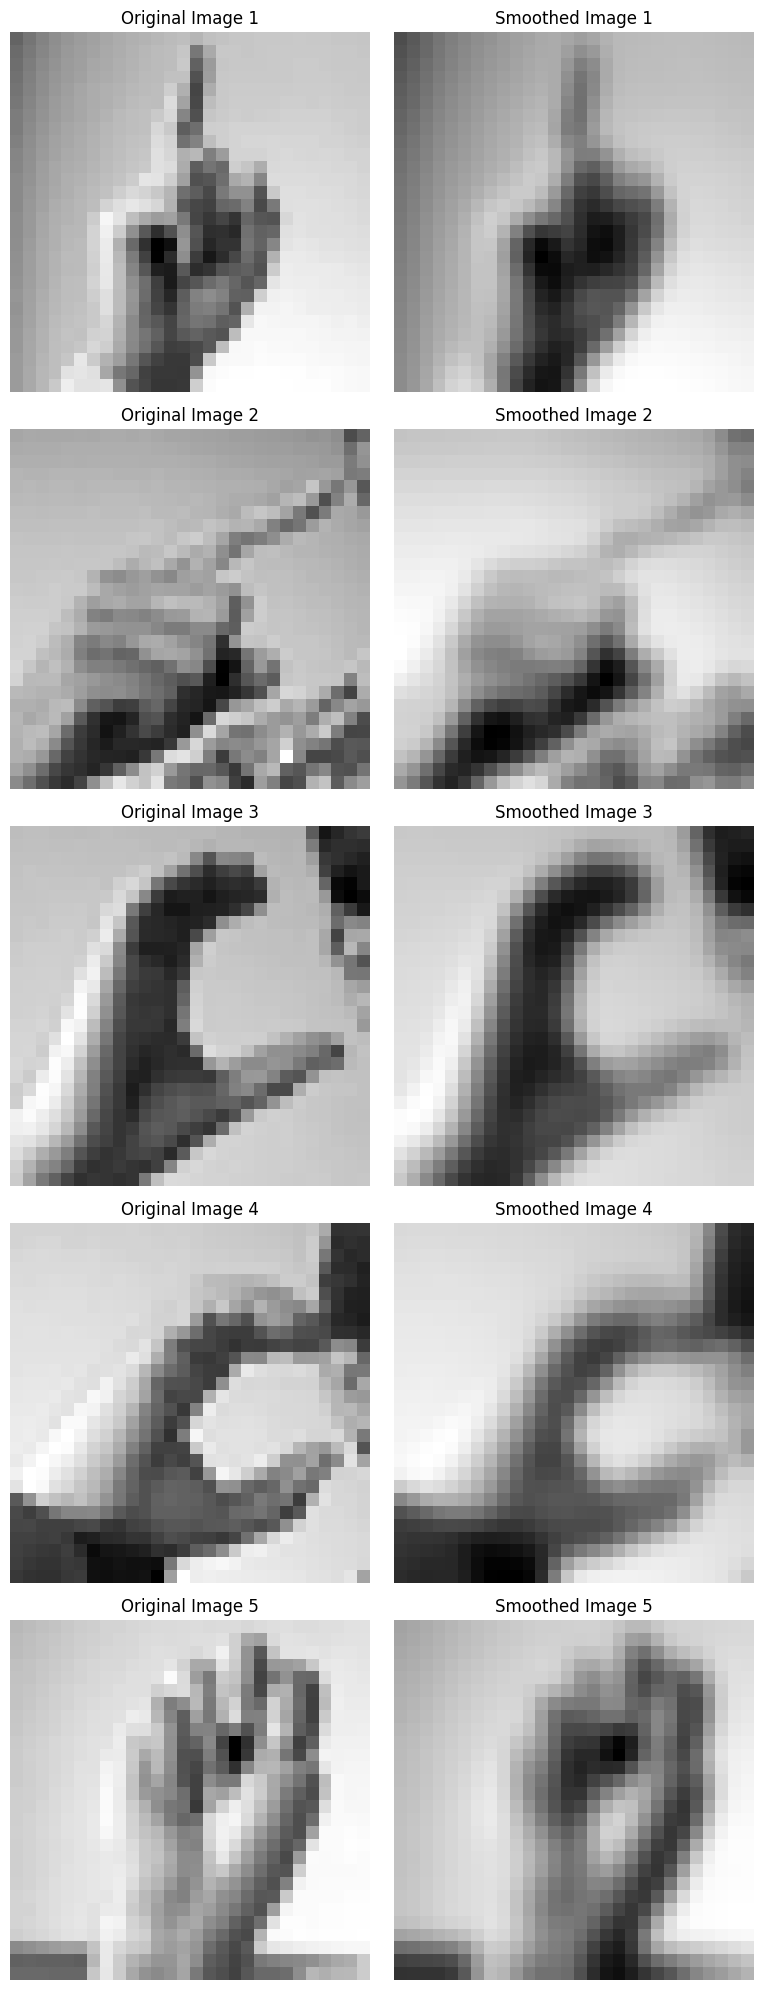

In [11]:
import matplotlib.pyplot as plt

# Plot the original images and their smoothed versions
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(8, 20))
for i in range(5):
    axs[i, 0].imshow(X_train[i], cmap='gray')
    axs[i, 0].set_title(f"Original Image {i+1}")
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(X_train_smoothed[i], cmap='gray')
    axs[i, 1].set_title(f"Smoothed Image {i+1}")
    axs[i, 1].axis('off')
    
plt.tight_layout()
plt.show()


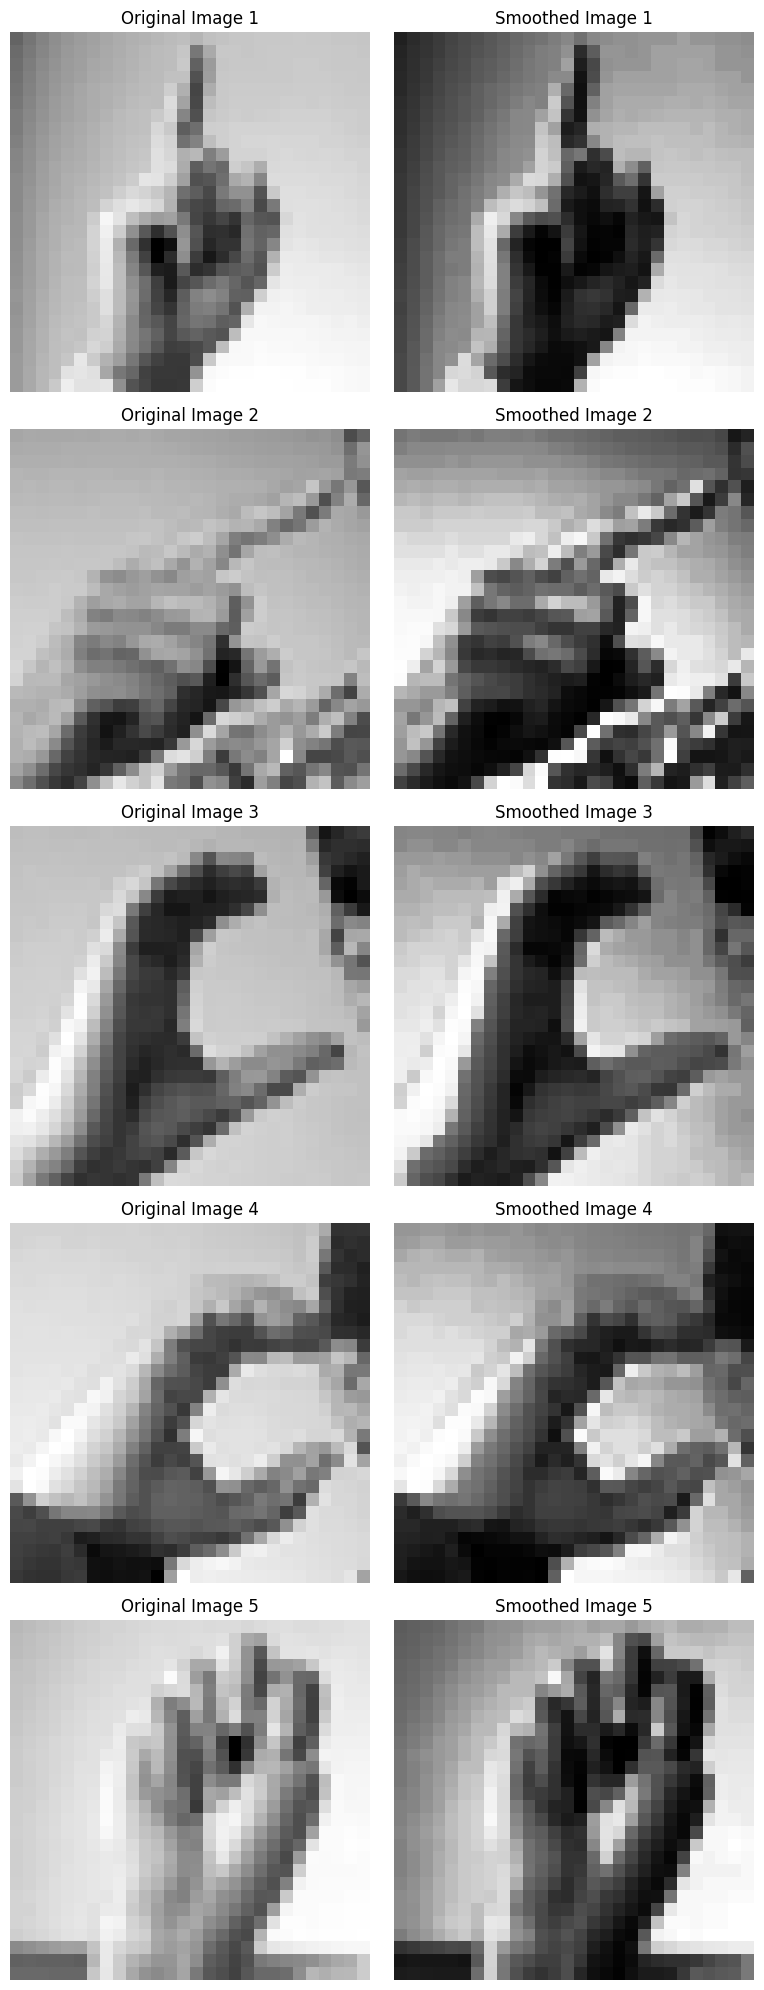

In [15]:
from skimage import exposure
import matplotlib.pyplot as plt


# Plot the original images and their smoothed versions
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(8, 20))
for i in range(5):
    image = X_train[i]
    image_eq = exposure.equalize_hist(image)
    axs[i, 0].imshow(X_train[i], cmap='gray')
    axs[i, 0].set_title(f"Original Image {i+1}")
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(image_eq, cmap='gray')
    axs[i, 1].set_title(f"Smoothed Image {i+1}")
    axs[i, 1].axis('off')
    
plt.tight_layout()
plt.show()

In [16]:
from sklearn.decomposition import PCA

# Reshape the training and test data to be 2D arrays
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Apply PCA to reduce the dimensionality of the data to 50 principal components
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

# Print the shape of the reduced data
print("Shape of reduced training data:", X_train_pca.shape)
print("Shape of reduced test data:", X_test_pca.shape)


Shape of reduced training data: (27455, 50)
Shape of reduced test data: (7172, 50)


C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


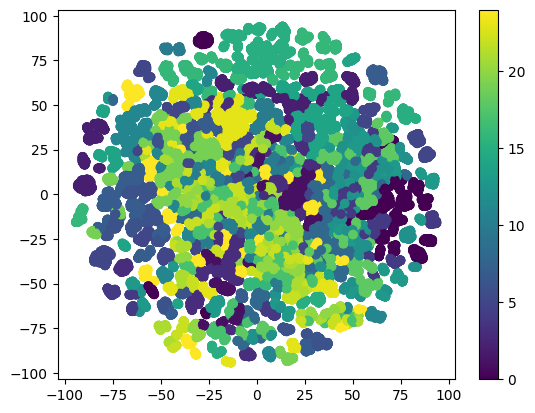

In [17]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensionality of the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_2d)

# Plot the t-SNE reduced data
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.colorbar()
plt.show()
